In [55]:
!pip install pandas
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
## Isi nama dan NIM seluruh anggota kelompok di sini
#   Nama    NIM
#   Herjanto Janawisuta (1301200421)
#   Alvin Tolopan Armando Sibuea (1301201580)
#   M Ivan Irsanto (1301200467)
#   
#   
#   

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree


# Load Dataset
Inisialisasi variable, masukan NIM di sini untuk random state.

Gunakan NIM salah satu anggota kelompok.



In [58]:
filepath = "https://raw.githubusercontent.com/Herjantoj/Case-Based-3/main/seeds_dataset.csv"

# Isi nim anda di sini
nim = 1301200421

Load dataset, cek konten data

Target kelas: **Category** 

In [59]:
df = pd.read_csv(filepath, sep="\t")
df.sample(10, random_state=nim)

,Area,Perimeter,Compactness,Kernel_len,Kernel_width,Assymetry,Groove_len,Category
73,19.11,16.26,0.9081,6.154,3.930,2.936,6.079,2
121,18.14,16.12,0.8772,6.059,3.563,3.619,6.011,2
21,14.11,14.26,0.8722,5.520,3.168,2.688,5.219,1
35,16.12,15.00,0.9000,5.709,3.485,2.270,5.443,1
61,11.23,12.63,0.8840,4.902,2.879,2.269,4.703,1
74,16.82,15.51,0.8786,6.017,3.486,4.004,5.841,2
193,10.82,12.83,0.8256,5.180,2.630,4.853,5.089,3
148,12.70,13.71,0.8491,5.386,2.911,3.260,5.316,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
131,18.94,16.32,0.8942,6.144,3.825,2.908,5.949,2


Training/test split **60/40**

In [60]:
# X: semua kolom, Y: kolom terakhir (category)
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, random_state=nim)

# We perform bootstrap on the train data
# Keep test data for final accuracy testing
len(x_train), len(x_test)

(126, 84)

In [61]:
# Hitung jumlah fitur yang dipergunakan
nr_features = len(x_train.columns)

# Bangun decision tree menggunakan entropy, dengan batasan max_depth = nr_feature + 1
# Note: Kedalaman tree dibatasi untuk mempermudah visualisasi
rf_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=nr_features+1)
rf_model = rf_model.fit(x_train, y_train)

# Random Forest
Build a Random Forest, consisting of 20 Decision Tree classifer, with the following steps:

1. Prepare Bootstrap data (choose randomly from the *training data*, use sampling with replacement)
2. Choose 2-4 random features/atributes for each tree
3. Build Decision Tree classifier using step (1) and (2)
4. Calculate OOB score within the tree only

**NOTE**
This whole exercise has been simplified.
- Tree can be created using a library, therefore you may not be able control the feature selection on node level
- Random features are only selected in the beginning of each tree.
- OOB score is only calculated within its own tree instead.
- Typically Random Forest don't use train/test split and can be validated using OOB error. We simplify this to make it easier to test.
- You are not allowed to use a Random Forest or Bagging library.


In [76]:
np.random.seed(nim)
n_tree = 20

forest = []
bootstrap_columns = []
for i in range(n_tree):
    # 1. Bootstrapping
    # select random rows
    rows = np.random.choice(range(x_train.shape[0]), size=x_train.shape[0], replace=True)
    x_bootstrap = x_train.iloc[rows, :]
    y_bootstrap = y_train.iloc[rows]

    # Out of Bag data
    non_selected_rows = np.setdiff1d(range(x_train.shape[0]), rows)
    x_oob = x_train.iloc[non_selected_rows, :]
    y_oob = y_train.iloc[non_selected_rows]

    # 2. Select random features (make sure to keep track the selected columns)
    # Check for any repeated combinations
    feature_taken = np.random.randint(2, 4)
    cols = np.random.choice(range(x_train.shape[1]), size=feature_taken, replace=False)
    bootstrap_columns.append(cols)

    # filter based on the selected columns
    x_bootstrap = x_bootstrap.iloc[:, cols]

    # 3. Build decision tree
    # Let it grow, no pruning
    tree_model = rf_model
    tree_model.fit(x_bootstrap, y_bootstrap)

    # Add it to the forest
    forest.append(tree_model)

    # 4. Calculate oob score only within its own tree
    # ....
    oob_score = tree_model.score(x_oob.iloc[:, cols], y_oob)
    print(f"Tree {i+1}: OOB Score = {oob_score:.3f}")
    print(f"nr of OOB Score : {oob_score}")
    print(f"Selected Column or Atribute : {cols}")


Tree 1: OOB Score = 0.771
nr of OOB Score : 0.7708333333333334
Selected Column or Atribute : [6 2]
Tree 2: OOB Score = 0.956
nr of OOB Score : 0.9555555555555556
Selected Column or Atribute : [0 6 1]
Tree 3: OOB Score = 0.750
nr of OOB Score : 0.75
Selected Column or Atribute : [3 4 1]
Tree 4: OOB Score = 0.917
nr of OOB Score : 0.9166666666666666
Selected Column or Atribute : [6 4 3]
Tree 5: OOB Score = 0.804
nr of OOB Score : 0.803921568627451
Selected Column or Atribute : [1 3 6]
Tree 6: OOB Score = 0.902
nr of OOB Score : 0.9019607843137255
Selected Column or Atribute : [3 5 1]
Tree 7: OOB Score = 0.814
nr of OOB Score : 0.813953488372093
Selected Column or Atribute : [3 0 5]
Tree 8: OOB Score = 0.760
nr of OOB Score : 0.76
Selected Column or Atribute : [2 3]
Tree 9: OOB Score = 0.904
nr of OOB Score : 0.9038461538461539
Selected Column or Atribute : [0 6]
Tree 10: OOB Score = 0.816
nr of OOB Score : 0.8163265306122449
Selected Column or Atribute : [4 2 1]
Tree 11: OOB Score = 0.80

# Prediction and Voting
Run prediction on x_test data for each tree

Also calculate accuracy per tree here

In [81]:
all_preds = []
for i, tree_model in enumerate(forest):
    # Each tree has different column requirements
    # Make sure you use the correct columns for each tree
    x_test_filtered = x_test.iloc[:, cols]

    predictions = tree_model.predict(x_test_filtered)

    # Might as well calculate accuracy per tree here...

    # acc = np.mean(predictions == y_test)
    acc = tree_model.score(x_test_filtered, y_test)
    print(acc)
    # add it to all_preds for voting later
    all_preds.append(predictions)

all_preds = np.array(all_preds)

0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809
0.8809523809523809


### Perform voting on the predictions from the Random Forest

In [64]:
# Insert voting code here
# ...
# ...
#  
voted_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=all_preds)

# Calculate accuracy of Test data on the Forest
acc = np.mean(voted_predictions == y_test)
acc



0.8809523809523809

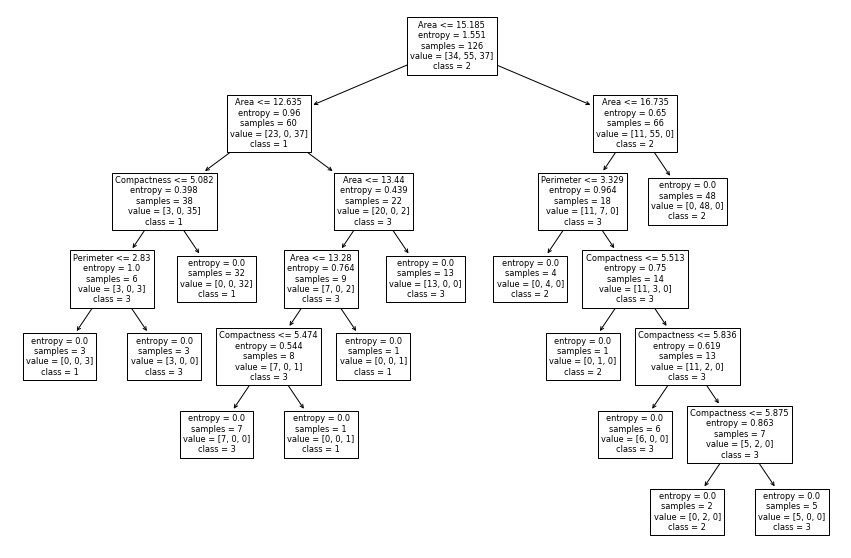

In [65]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(tree_model, ax=ax, feature_names=x_train.columns, class_names=y_train.unique().astype(str))
plt.show()

After you're done with all this, please check the excel file and put the answers for every column there.